<a href="https://colab.research.google.com/github/Eduarmma19/prueba_tecnica/blob/main/Prueba_tecnica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prueba tecnica cientifico de datos junior 

## Contexto
OFFCORSS es una compañia dedicada al diseño, producción y comercialización de propuestas completas de vestuario y accesorios para bebes, niños y niñas. Se encuentra en busqueda de un cientifico de datos junior y plantea una prueba tecnica donde se debe realizar un EDA y predecir el número de unidades de acuerdo a unas caracteristicas dadas de sus campañas atraves de los años en su mercado de acción. 

## Objetivo de la prueba
1. Realizar un EDA ( Exploratory Data Analysis) 
2. Predecir el número de unidades dependiendo de las caracteristicas dadas 





## Plan EDA

1.   Importación de los datos 
2.   Entendiendo la base de datos (dimensión,columnas, # de NA, etc)
3.   Planteamiento de preguntas de acuerdo a la base de datos (Visualizaciones y tablas)


### Importación de datos

In [1]:
# Librerías a usar 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
# Traer la base de datos desde el ordenador para el espacio de trabajo en colab
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving BD Camisetas tiendas piloto analitica.xlsx to BD Camisetas tiendas piloto analitica.xlsx
User uploaded file "BD Camisetas tiendas piloto analitica.xlsx" with length 8528734 bytes


In [3]:
# El archivo de excel contiene la base de datos de los productos y en otra hoja información de las tiendas
# Base de datos de los productos y sus caracteristicas
df_productos = pd.read_excel("/content/BD Camisetas tiendas piloto analitica.xlsx", sheet_name= "Base")
# Esta es la segunda pagina del documento de excel que contiene información de las tiendas
df_tiendas = pd.read_excel("/content/BD Camisetas tiendas piloto analitica.xlsx", sheet_name= "Parametros Tiendas")


### Entendiendo la base de datos

In [4]:
#Un pequeño vistaso de los datos de los productos 
df_productos.head()

,Año,Año/Semana,Centro,Material,Color,Talla,Mat:Concepto Diseño,Unidades
0,2017,1.2017,T013,5133050,Rojo 18-1763,10,BASICOS CLASICOS,1
1,2017,1.2017,T013,5133196,Azul 19-4050,10,BASICOS CLASICOS,2
2,2017,1.2017,T013,5133196,Negro 19-4006,8,BASICOS CLASICOS,2
3,2017,1.2017,T013,5133197,Azul 19-3921,6,BASICOS CLASICOS,1
4,2017,1.2017,T013,5133197,Azul 19-3939,8,BASICOS CLASICOS,1


In [ ]:
# Un pequeño vistazo de los datos de las tiendas
df_tiendas.head()


,Centro,Tienda,Ciudad,Clima
0,T013,Tda Chipichape 2,Cali,C
1,T014,Tda El Tesoro,Medellin,M
2,T024,Tda San Diego,Medellin,M
3,T025,Tda SantaFe Bog.,Bogotá,F
4,T049,Tda Calima Bogota.,Bogotá,F


#### Dimensiones BD

In [ ]:
# Dimensiones de df_productos y df_tiendas respectivamente
print(df_productos.shape,df_tiendas.shape, sep = "\n")

(253331, 8)
(47, 4)


#### Tipos de variables en la BD


In [ ]:
#Conociendo los tipos de variables de df_productos y df_tiendas respectivamente
print(df_productos.dtypes,df_tiendas.dtypes, sep= "\n\n")

Año                      int64
Año/Semana             float64
Centro                  object
Material                 int64
Color                   object
Talla                   object
Mat:Concepto Diseño     object
Unidades                 int64
dtype: object

Centro    object
Tienda    object
Ciudad    object
Clima     object
dtype: object


#### Explicación de las variables
La base de datos llamada *Base* contiene las siguientes variables:
- **Año**: No requiere explicación
- **Año/Semana**: No requiere explicación
- **Centro**: Código que representa una tienda de OFFCORSS
- **Material**: Referencia de un producto
- **Color**: Código de color de la referencia en cuestión.
- **Talla**: Talla de la referencia en cuestión
- **Mat:Concepto Diseño**: Esta variable representa la campana, una campana es el nombre que se
le da a una colección en específico, por ejemplo, “Escolar” es el nombre que se le dio a la
campana que contaba con varias referencias para un periodo de tiempo específico.

En la pestaña dos se encuentran características importantes de cada Centro llamada *Parametros tiendas*, algo así como un diccionario con información de cada tienda que contiene las siguientes variables:

- **Centro**: código que representa una tienda de OFFCORSS
- **Tienda**: nombre de la tienda de OFFCORSS
- **Ciudad**: ciudad donde se encuentra ubicada la tienda de OFFCORSS
- **Clima**: cual es el clima predominante en esa ciudad donde esta la tienda de OFFCORSS


#### Valores NA
No tenemos valores NA, si fuese así nos indicaría el ouput el porcentaje de ellos

In [ ]:
# Porcentaje de NA ( No tenemos NA dentro de la base de datos)
print(df_productos.isnull().sum()/df_productos.shape[0], df_tiendas.isnull().sum()/df_tiendas.shape[0], sep= "\n\n")

Año                    0.0
Año/Semana             0.0
Centro                 0.0
Material               0.0
Color                  0.0
Talla                  0.0
Mat:Concepto Diseño    0.0
Unidades               0.0
dtype: float64

Centro    0.0
Tienda    0.0
Ciudad    0.0
Clima     0.0
dtype: float64


#### Crear y modificar variables
Tenemos una aclaración en la prueba que nos dice que la unión del las variables **Material**, **Color** y **Talla** forman un *Plu*, que nos indica un producto de una talla y color específico. Por ejemplo,una camisa azul de rayas de navidad talla 16. Por esa razón, las uniré en una variable llamada **plu** y elimaré las variables que le dieron origen, debido a que resulta redundante tenerlas en el dataframe.

Por otro lado,La variable **Año/Semana** esta en formato float y la parte entera indica la semana mientras que la decimal el año pero ya tengo la variable **Año** , así que de esta variable solo me quedaré con la parte entera es decir las semanas y la renombro a **Semana**.

In [5]:
# Creando la variable "plu" que indica la union de Material, Color y talla
df_productos["plu"] = df_productos["Material"].astype(str) + " " + df_productos["Color"] + " " + df_productos["Talla"]

In [6]:
# La variable año/ mes esta en formato float y la parte entera indica la semana mientras que la decimal el año
# pero ya tengo la variable año , así que de esta variable solo me quedaré con la parte entera es decir las semanas y la renombro a "Semana"
df_productos["Año/Semana"] = df_productos["Año/Semana"].astype(int)
df_productos = df_productos.rename(columns= {"Año/Semana":"Semana"})


In [7]:
#Unir las bases de datos (Con la Primary key "Centro") para algunas visualizaciones y eliminar variables que uní 
df_total = pd.merge(df_productos,df_tiendas, on = "Centro")
 #Reorganizar las columnas me siento más comodo con # de unidades al final
df_total = df_total[['Año','Semana','Centro','plu','Ciudad','Clima','Mat:Concepto Diseño','Material','Color','Talla','Unidades']]
df_total.head()

,Año,Semana,Centro,plu,Ciudad,Clima,Mat:Concepto Diseño,Material,Color,Talla,Unidades
0,2017,1,T013,5133050 Rojo 18-1763 10,Cali,C,BASICOS CLASICOS,5133050,Rojo 18-1763,10,1
1,2017,1,T013,5133196 Azul 19-4050 10,Cali,C,BASICOS CLASICOS,5133196,Azul 19-4050,10,2
2,2017,1,T013,5133196 Negro 19-4006 8,Cali,C,BASICOS CLASICOS,5133196,Negro 19-4006,8,2
3,2017,1,T013,5133197 Azul 19-3921 6,Cali,C,BASICOS CLASICOS,5133197,Azul 19-3921,6,1
4,2017,1,T013,5133197 Azul 19-3939 8,Cali,C,BASICOS CLASICOS,5133197,Azul 19-3939,8,1


### Planteamiento de preguntas de acuerdo a la base de datos 
Con lo que visto de la base de datos podriamos plantearnos preguntas y darles respuesta como:


#### ¿ En que ciudades tienen presencia las tiendas de OFFCORSS?
Podríamos verlas de la siguiente forma:

In [8]:
#Conocer las ciudades donde hay tiendas presentes  
df_total["Ciudad"].unique()

array(['Cali', 'Medellin', 'Bogotá', 'San andres', 'Rionegro',
       'Villavicencio', 'Ipiales', 'Girardot', 'Apartado', 'Palmira',
       'Sincelejo', 'Cartago', 'Mosquera', 'Yopal', 'Chia', 'La ceja',
       'Soacha', 'Llanogrande'], dtype=object)

Pero para hacerlo más llamativo podemos trazar las ubicaciones en el mapa del país, en este caso, Colombia. 

Teniendo los nombres de las ciudades investigue como hallar las coordenadas de cada una y encontré la siguiente función para obtenerlas y esta en este [link](https://es.stackoverflow.com/questions/330223/usar-geopy-en-un-dataframe-para-hallar-latitud-y-longitud), la cual usé y pude trazar en el mapa con la librería [Folium](https://mappinggis.com/2018/10/folium-utilizando-leaflet-con-python/)


In [ ]:
from time import sleep
from geopy.geocoders import Nominatim
import numpy as np
import pandas as pd

def get_coords(neight):
    geolocator = Nominatim(user_agent="Colombia")
    address = f'{neight},Colombia'
    location = geolocator.geocode(address)
    if location is not None:
        latitude = location.latitude
        longitude = location.longitude
    else:
        latitude = longitude = np.NaN
    sleep(2)
    return pd.Series({"Latitud": latitude, "Longitude": longitude})

In [ ]:
df = pd.DataFrame({"Neighbourhood": ('Cali', 'Medellin', 'Bogotá', 'San andres', 'Rionegro',
       'Villavicencio', 'Ipiales', 'Girardot', 'Apartado', 'Palmira',
       'Sincelejo', 'Cartago', 'Mosquera', 'Yopal', 'Chia', 'La ceja',
       'Soacha', 'Llanogrande'        )})
# Obtener las coordenadas de las ciudades donde la empresa tiene presencia 
lldata = pd.concat([df, df.Neighbourhood.apply(get_coords)], axis=1)
import folium
mi_mapa = folium.Map(location=(4.570868,-74.297333), zoom_start= 6.1)
for i in range(len(lldata)):
  x = lldata['Latitud'][i]
  y = lldata['Longitude'][i]
  z = lldata['Neighbourhood'][i]
  folium.Marker([x,y],popup=z).add_to(mi_mapa)

#Imprimir en el mapa las ubicaciones de las tiendas presentes en la base de datos
mi_mapa

En el mapa anterior al presionar en cada marcador se puede ver en que ciudad tienen presencia las tiendad de OFFCORSS

#### ¿ Cuales son las 10 ciudades con más participación de OFFCORSS?
Dando respuesta a la pregunta tenemos lo siguiente:

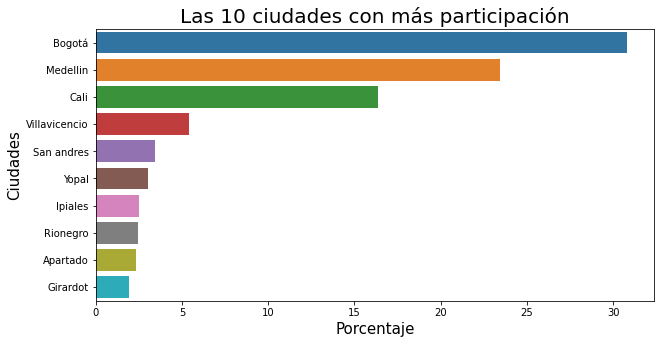

In [9]:
# ¿ Cuales son las 10 ciudades con más participación?
total = len(df_total["Ciudad"])
ciudad_conteo = df_total["Ciudad"].value_counts()
ciudad_conteo = ciudad_conteo[:10,]
plt.figure(figsize=(10,5))

ax1 =sns.barplot(x = ((ciudad_conteo.values/total)*100),y = ciudad_conteo.index, orient= "h")
plt.title("Las 10 ciudades con más participación",fontsize = 20)
plt.ylabel("Ciudades",fontsize = 15)
plt.xlabel("Porcentaje",fontsize = 15)
plt.show()

Podríamos decir, que el 50% de participación de OFFCORSS esta conjuntamente entre Bogotá y Medellin. ¿Será que este orden de participación corresponde al el orden de las ciudades con más unidades?,veamos la siguiente tabla.

In [ ]:
df_ciudades =df_total.groupby('Ciudad')['Unidades'].sum().sort_values(ascending = False)
df_frame =pd.DataFrame()
df_frame['Ciudad']= df_ciudades.index
df_frame['Unidades']=df_ciudades.values
df_frame.head(10)

,Ciudad,Unidades
0,Bogotá,85761
1,Medellin,71080
2,Cali,49119
3,Villavicencio,15538
4,San andres,10987
5,Yopal,8060
6,Rionegro,6997
7,Ipiales,6992
8,Apartado,6576
9,Girardot,5337


#### ¿ De las campañas de OFFCORSS cuales son las más populares a lo largo del país?


<function matplotlib.pyplot.show>

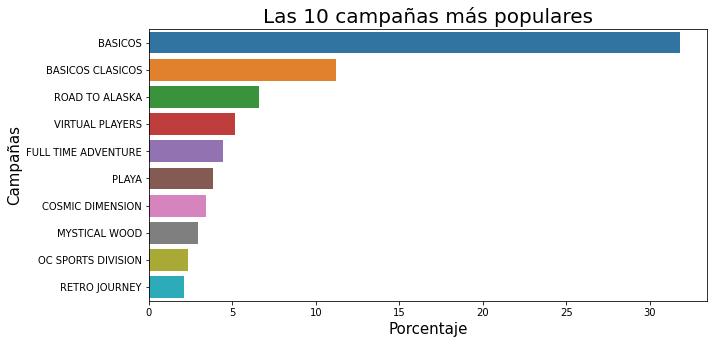

In [10]:
# Las 10 campañas más populares
campana_conteo = df_total['Mat:Concepto Diseño'].value_counts()
campana_conteo = campana_conteo[:10,]
plt.figure(figsize=(10,5))
sns.barplot(x = (campana_conteo.values/total)*100, y = campana_conteo.index, orient= "h")
plt.title("Las 10 campañas más populares",fontsize = 20)
plt.ylabel('Campañas',fontsize = 15)
plt.xlabel('Porcentaje',fontsize = 15)
plt.show

La campaña de BASICOS sin tener en cuenta la referencia del producto arrasa con más de un 30%, mientrás que la inmediatamente anterior solo tiene un 12% aproximadamente que corresponde a la campaña de BASICOS CLASICOS

#### ¿Durante 2017 a 2021 en las 3 ciudades y campañas 

#### ¿En que años y ciudades principales las mejores campañas han tenido una mayor participación?


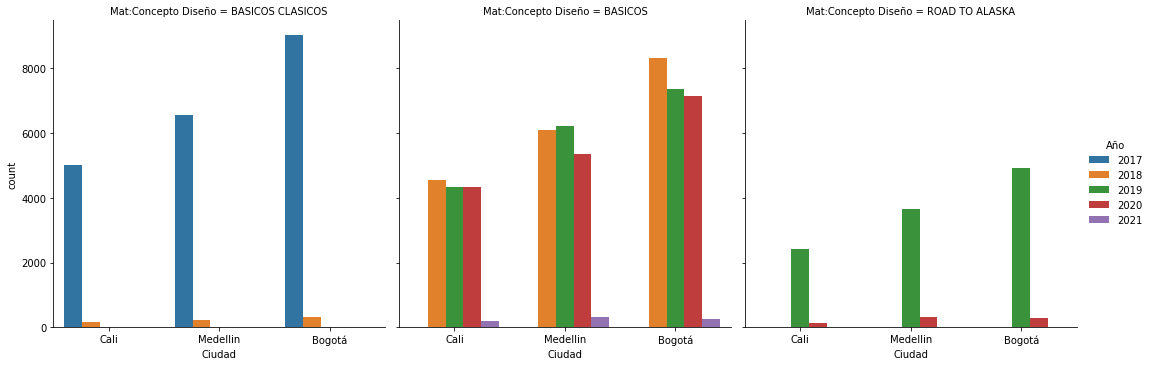

In [11]:
df_name_campanas = df_total['Mat:Concepto Diseño'].isin(['BASICOS CLASICOS','BASICOS','ROAD TO ALASKA']) & df_total['Ciudad'].isin(['Bogotá','Medellin','Cali',])
df_filtrado = df_total[df_name_campanas]
sns.catplot(x= 'Ciudad',kind= 'count',data = df_filtrado, col = 'Mat:Concepto Diseño' ,col_wrap=3, hue = "Año")
plt.show()


Que conclusiones podemos sacar de esto:
- Con respecto a la campaña de BASICOS CLASICOS, tuvo un aumento durante los años 2017 y 2018 a lo largo de las 3 principales ciudades pero no siguió para el año 2019. 
- La campaña BASICOS surgió desde el 2018 y se ha mantenido a lo largo de los años en las principales ciudades en aumento, lo cual puede decir que se ha vuelto una campaña estandarte que puede seguir en el mercado
- La campaña ROAD TO ALASKA, surgió en 2019 de las más recientes con respecto a las anteriomente mencionadas, pero no ha tenido una buena participación en el presente año. 

## Modelamiento - Predicción de unidades

En el análisis EDA, fuimos concientes del tipo de variables que teniamos. Vamos a recordar que tipos de variables tenemos y son las siguientes: 

In [12]:
df_productos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253331 entries, 0 to 253330
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Año                  253331 non-null  int64 
 1   Semana               253331 non-null  int64 
 2   Centro               253331 non-null  object
 3   Material             253331 non-null  int64 
 4   Color                253331 non-null  object
 5   Talla                253331 non-null  object
 6   Mat:Concepto Diseño  253331 non-null  object
 7   Unidades             253331 non-null  int64 
 8   plu                  253331 non-null  object
dtypes: int64(4), object(5)
memory usage: 17.4+ MB


In [13]:
#Veamos el data frame
df_productos.head()

,Año,Semana,Centro,Material,Color,Talla,Mat:Concepto Diseño,Unidades,plu
0,2017,1,T013,5133050,Rojo 18-1763,10,BASICOS CLASICOS,1,5133050 Rojo 18-1763 10
1,2017,1,T013,5133196,Azul 19-4050,10,BASICOS CLASICOS,2,5133196 Azul 19-4050 10
2,2017,1,T013,5133196,Negro 19-4006,8,BASICOS CLASICOS,2,5133196 Negro 19-4006 8
3,2017,1,T013,5133197,Azul 19-3921,6,BASICOS CLASICOS,1,5133197 Azul 19-3921 6
4,2017,1,T013,5133197,Azul 19-3939,8,BASICOS CLASICOS,1,5133197 Azul 19-3939 8


### Variable de respuesta


Tenemos 4 variables *int64* y 5 variables *object* , ya teniendo claro eso me concentraré en la variable de respuesta que será la variable **Unidades**, que tiene un formato *int64*, es decir, discreta. 

Ahora echemos un vistazo a su distribución suavizada con los datos de **Unidades** como estan y despúes aplicando la raíz cuadrada para visualizarla mejor. 

<Figure size 720x1080 with 0 Axes>

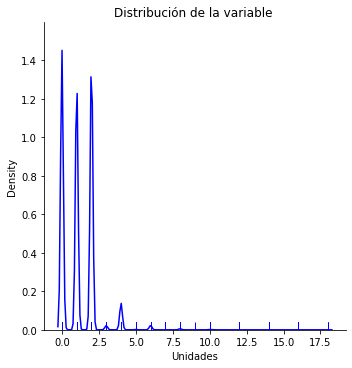

In [14]:
plt.figure(figsize=(10,15))
sns.displot(df_productos.Unidades, rug = True,color = 'blue', kind = "kde")
plt.title("Distribución de la variable ")
plt.show()

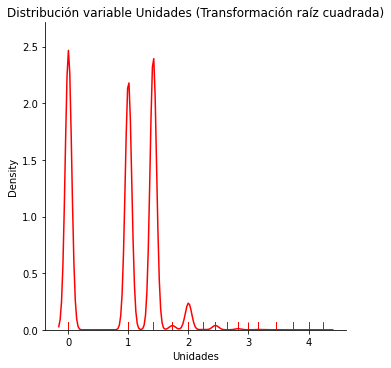

In [15]:
sns.displot(np.sqrt(df_productos.Unidades), rug = True,color = 'red', kind = "kde")
plt.title("Distribución variable Unidades (Transformación raíz cuadrada)")
plt.show()

### Correlación variables númericas vs variable de respuesta
Usando la correlación de pearson nos dará un indicio de que tan correlacioandas estan las variables númericas como **Año**, **Semana** y **Material**  con respecto a la variable de respuesta **Unidades**.[texto del enlace](https://)

El coeficiente de correlación puede tomar un rango de valores de +1 a -1. Un valor de 0 indica que no hay asociación entre las dos variables. Un valor mayor que 0 indica una asociación positiva. Es decir, a medida que aumenta el valor de una variable, también lo hace el valor de la otra. Un valor menor que 0 indica una asociación negativa; es decir, a medida que aumenta el valor de una variable, el valor de la otra disminuye.

Text(0.5, 1.0, 'Heatmap de correlaciones entre variables')

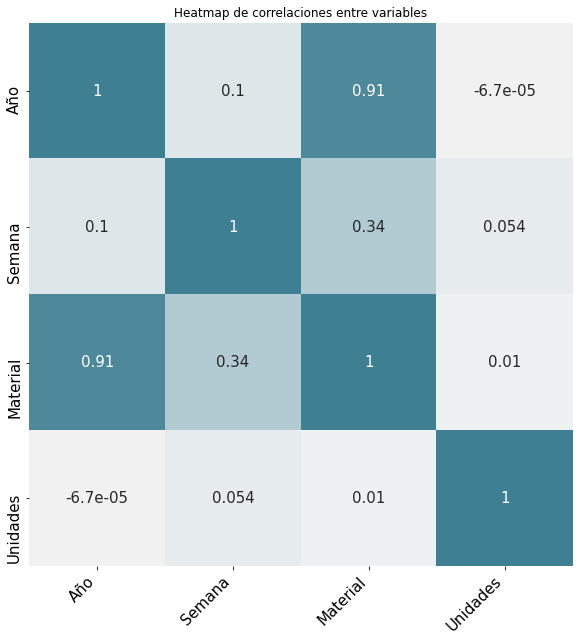

In [16]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['Variable_1','Variable_2','Correlacion']
    corr_mat = corr_mat.loc[corr_mat['Variable_1'] != corr_mat['Variable_2'], :]
    corr_mat['abs_correlacion'] = np.abs(corr_mat['Correlacion'])
    corr_mat = corr_mat.sort_values('abs_correlacion', ascending=False)
    
    return(corr_mat)

corr_matrix = df_productos.select_dtypes(include=['float64', 'int']).corr(method='pearson')
correlaciones =tidy_corr_matrix(corr_matrix)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
sns.heatmap(corr_matrix, annot = True, cbar = False,annot_kws = {"size": 15},
    vmin = -1,vmax = 1,center = 0,cmap = sns.diverging_palette(20, 220, n=200),
    square = True, ax  = ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45, horizontalalignment = 'right',)
ax.tick_params(labelsize = 15)
plt.title("Heatmap de correlaciones entre variables")

En este caso vemos que las correlaciones estan muy cerca a 0, lo cual nos muestran una poca relación con respecto a la variable de respuesta que son el número de unidades, se podría ver igualmente al implementar los modelos 




### Variables categóricas 
Para este caso decidí eliminar las variables **Color** y **Talla** , y por otro lado en las númericas la variable **Material** las 3 estan incluidas en la variable **plu** , que indica ejemplo: Camisa verde de rayas talla 10.

Un poco el resumen de las variables categoricas del dataset.

In [23]:
variables_cat = df_productos.select_dtypes(include=['object'])
variables_cat.describe()

,Centro,Color,Talla,Mat:Concepto Diseño,plu
count,253331,253331,253331,253331,253331
unique,47,196,10,55,4700
top,T024,Blanco 10-0000,10,BASICOS,5133612 Blanco 10-0000 8
freq,10793,66784,48749,80633,730


La base de datos quedaría así.

In [18]:
df_modelo =df_productos.drop(['Color','Talla','Material'],axis=1)
df_modelo.head()

,Año,Semana,Centro,Mat:Concepto Diseño,Unidades,plu
0,2017,1,T013,BASICOS CLASICOS,1,5133050 Rojo 18-1763 10
1,2017,1,T013,BASICOS CLASICOS,2,5133196 Azul 19-4050 10
2,2017,1,T013,BASICOS CLASICOS,2,5133196 Negro 19-4006 8
3,2017,1,T013,BASICOS CLASICOS,1,5133197 Azul 19-3921 6
4,2017,1,T013,BASICOS CLASICOS,1,5133197 Azul 19-3939 8


### División train and test

Antes de entrenar los modelos es ideal preparar los datos y más aun contando con variables categoricas. 

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.model_selection import train_test_split

Por lo general un 80% de entrenamiento y 20% de test, son lo convencional y da buenos resultados a los modelos 

In [20]:
#Muestreo
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(
    df_modelo.drop('Unidades',axis= 'columns'),
    df_modelo['Unidades'],
    train_size = 0.8,
    random_state = 1234,
    shuffle = True
)

Ya tenemos los conjuntos de datos de entrenamiento (x_train, y_train) y test (x_test, y_test). Ahora vamos a preprocesar danle escalas a las variables númericas y binarizando las categóricas. 

In [21]:
# Identificación de columnas numéricas y categóricas
numeric_cols = x_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = x_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )
#Asignamos las variables tanto categoricas como númericas 
preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

### Modelos
Importamos las librerías con lo modelos a usar y las metricas a usar 

In [23]:
#Importación de librerías importantes
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_squared_error

#### Ridge

In [24]:
pipe_r = Pipeline([('preprocessing', preprocessor),
                 ('modelo', Ridge())])

In [25]:
_ = pipe_r.fit(X=x_train, y=y_train)

In [26]:
# Predicciones
y_pred_r = pipe_r.predict(x_test)

In [27]:
#Comparandos las predicciones hechas con el test
df_predicciones_r = pd.DataFrame({'Actual':y_test,'Prediccion':y_pred_r})
df_predicciones_r.head()

,Actual,Prediccion
154258,1,1.059760
7183,1,1.187742
204767,0,1.073581
202110,0,1.262728
64844,0,1.075928


In [29]:
#Performance de el modelo de ridge
mse_r = mean_squared_error(y_test, y_pred_r)
rmse_r =  np.sqrt(mean_squared_error(y_test, y_pred_r))
r2_r = r2_score(y_test,y_pred_r)

print('MSE ridge:', mse_r)
print('RMSE ridge:', rmse_r)
print('R2_score ridge:', r2_r)

MSE ridge: 1.1962361549530802
RMSE ridge: 1.0937258134254124
R2_score ridge: 0.006697925267089455


#### Random Forest

In [30]:
#Creacción y entrenamiento del modelo RandomForest
pipe_ra = Pipeline([('preprocessing', preprocessor),
                 ('modelo', RandomForestRegressor(n_estimators=10))])

In [31]:
_ = pipe_ra.fit(X=x_train, y=y_train)

In [32]:
y_pred_ra = pipe_ra.predict(x_test)
df_predicciones_ra = pd.DataFrame({'Unidades' : y_test, 'prediccion' : y_pred_ra})
df_predicciones_ra.head()

,Unidades,prediccion
154258,1,0.6
7183,1,0.9
204767,0,1.3
202110,0,5.4
64844,0,1.1


In [33]:
#Performance de el modelo de randomforest
mse_ra = mean_squared_error(y_test, y_pred_ra)
rmse_ra =  np.sqrt(mean_squared_error(y_test, y_pred_ra))
r2_ra = r2_score(y_test,y_pred_ra)

print('MSE Random Forest:', mse_ra)
print('RMSE Random Forest:', rmse_ra)
print('R2_score Random Forest:', r2_ra)

MSE Random Forest: 1.435620423549845
RMSE Random Forest: 1.1981737868731084
R2_score Random Forest: -0.1920762797015887


#### Regresión lineal


In [37]:
#Creacción y entrenamiento del modelo lineal
pipe_l = Pipeline([('preprocessing', preprocessor),
                 ('modelo', LinearRegression())])

In [38]:
_ = pipe_l.fit(X=x_train, y=y_train)

In [39]:
y_pred_l = pipe_l.predict(x_test)
df_predicciones_l = pd.DataFrame({'Unidades' : y_test, 'prediccion' : y_pred_l})
df_predicciones_l.head()

,Unidades,prediccion
154258,1,1.055307
7183,1,1.187307
204767,0,1.078840
202110,0,1.263377
64844,0,1.074143


In [41]:
#Performance de el modelo lineal
mse_l = mean_squared_error(y_test,y_pred_l)
rmse_l =  np.sqrt(mean_squared_error(y_test,y_pred_l))
r2_l = r2_score(y_test,y_pred_l)

print('MSE Regresion lineal:', mse_l)
print('RMSE Regresion lineal:', rmse_l)
print('R2_score Regresion lineal:', r2_l)

MSE Regresion lineal: 1.1991110011866892
RMSE Regresion lineal: 1.0950392692441167
R2_score Regresion lineal: 0.004310778952744898


### Conclusiones

Las metricas para los modelos no nos ha mostrado unos buenos resultados, debido a la baja correlación de los predictores con la variable de respuesta.

### Agradecimiento
Mi primera experiencia con Python manipulando datos, aprendí muchas cosas desde que recibí la prueba y seguiré aprendiendolas. Soy conciente de que debo mejorar día y a día mis análisis, gracias por tenerme en cuenta. 

